In [5]:
#Here, there are four treatments (A, B, C, and D), which are groups for ANOVA analysis. 
#Treatments are independent variable and termed as factor. 
#As there are four types of treatments, treatment factor has four levels.

In [31]:
# load packages
import pandas as pd
%matplotlib inline
# load data file
d = pd.read_csv("https://reneshbedre.github.io/myfiles/anova/onewayanova.txt", sep="\t")

In [32]:
d.shape

(5, 4)

In [33]:
d

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [34]:
d.describe()

,A,B,C,D
count,5.000000,5.000000,5.000000,5.000000
mean,29.600000,45.000000,31.200000,60.000000
std,4.037326,11.202678,3.898718,8.514693
min,25.000000,29.000000,27.000000,51.000000
25%,28.000000,40.000000,29.000000,54.000000
50%,29.000000,45.000000,30.000000,60.000000
75%,30.000000,55.000000,33.000000,62.000000
max,36.000000,56.000000,37.000000,73.000000


In [35]:
d.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [36]:
d.iloc[0:1]

,A,B,C,D
0,25,45,30,54


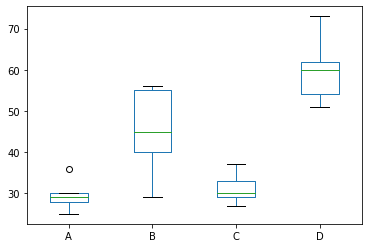

In [8]:
# generate a boxplot to see the data distribution by treatments. 
#Using boxplot, we can easily detect the differences 
# between different treatments
d.boxplot(column=['A', 'B', 'C', 'D'], grid=False)

In [9]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F 
#and P-value
fvalue, pvalue = stats.f_oneway(d['A'], d['B'], d['C'], d['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


In [37]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

In [38]:
d_melt

,index,variable,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [12]:
# = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [11]:
!pip install statsmodels

     |████████████████████████████████| 10.5MB 2.8MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/ea/0c/5f61f1a3d4385d6bf83b83ea495068857ff8dfb89e74824c6e9eb63286d8/patsy-0.5.1-py2.py3-none-any.whl
